In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create a new directory for saving plots if it doesn't exist
output_directory = './advanced_distribution_plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load the datasets (assuming they are stored as CSVs)
df_before_imputed_full = pd.read_csv('./dataset/Li-rich data collection_full.csv')  # Before imputation (Imputed target)
df_before_imputed_half = pd.read_csv('./dataset/Li-rich data collection_half.csv')  # Before imputation (Without Imputed Target)
df_mean_imputed_full = pd.read_csv('./dataset/Li-rich_train_Mean Imputer_full.csv')      # Mean imputed (Imputed Target)
df_mean_imputed_half = pd.read_csv('./dataset/Li-rich_train_Mean Imputer_half.csv')      # Mean imputed (Without Imputed Target)
df_knn_imputed_full = pd.read_csv('./dataset/Li-rich_train_KNN Imputer_full.csv')  # KNN imputed (Imputed Target)
df_knn_imputed_half = pd.read_csv('./dataset/Li-rich_train_KNN Imputer_half.csv')  # KNN imputed (Without Imputed Target)
df_mice_imputed_full = pd.read_csv('./dataset/Li-rich_train_MICE Imputer_full.csv')  # MICE imputed (Imputed Target)
df_mice_imputed_half = pd.read_csv('./dataset/Li-rich_train_MICE Imputer_half.csv')  # MICE imputed (Without Imputed Target)
df_matimputer_full_imputed = pd.read_csv('./dataset/Li-rich_train_MatImputer_full.csv')  # MatImputer (Imputed Target)
df_matimputer_half_imputed = pd.read_csv('./dataset/Li-rich_train_MatImputer_half.csv')  # MatImputer (Without Imputed Target)

# List of features to compare
features = ['Li_fraction_in_TM_layer', 'Ni_fraction', 'Co_fraction', 'Mn_fraction',
            'first_sintering_temperature', 'first_sintering_time', 'second_sintering_temperature',
            'second_sintering_time', 'mean_primary_particle_size']

# Define the plot colors for each dataset (scientifically appropriate colors)
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-green
    '#17becf'   # Cyan (added for the 10th category)
]

# Set the style for the plots
sns.set(style="whitegrid")

# Define font size parameters for flexibility
font_size_title = 28  # Title font size
font_size_labels = 23  # Label font size
font_size_ticks =  23 # Tick font size
font_size_yaxis_title = 28 # Y-axis title font size
font_size_xaxis_title = 28  # X-axis title font size

# Prepare the grid for subplots with more control over spacing
fig, axes = plt.subplots(3, 3, figsize=(24, 20))  # Increase the figure size to make the plots more readable

# Reduce the space between plots
fig.subplots_adjust(hspace=0.32, wspace=0.32, bottom=0.1)  # Adjust spacing

category_order = [
    'Before Imputed (Imputed Target)',  # Full first
    'MatImputer (Imputed Target)', 
    'MICE Imputed (Imputed Target)', 
    'KNN Imputed (Imputed Target)', 
    'Mean Imputed (Imputed Target)', 
    
    'Before Imputed (Without Imputed Target)',  # Half second
    'MatImputer (Without Imputed Target)', 
    'MICE Imputed (Without Imputed Target)', 
    'KNN Imputed (Without Imputed Target)', 
    'Mean Imputed (Without Imputed Target)'
]

# Loop through each feature and create a subplot for its distribution
for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]  # Access the correct subplot (3x3 grid)
    
    # Skip NaN values for the 'before_imputed' datasets (imputed target and without imputed target versions)
    before_imputed_full_clean = df_before_imputed_full[feature].dropna()  # Drop NaNs for imputed target version
    before_imputed_half_clean = df_before_imputed_half[feature].dropna()  # Drop NaNs for without imputed target version
    
    # Combine data into a single DataFrame for easier plotting
    if i == len(features) - 1:  # For the last feature, use df_mean_imputed_half for the last dataset
        comparison_data = pd.DataFrame({
            'Before Imputed (Imputed Target)': before_imputed_full_clean,
            'Before Imputed (Without Imputed Target)': before_imputed_half_clean,
            'Mean Imputed (Imputed Target)': df_mean_imputed_full[feature],
            'Mean Imputed (Without Imputed Target)': df_mean_imputed_half[feature],  # Last dataset
            'KNN Imputed (Imputed Target)': df_knn_imputed_full[feature],
            'KNN Imputed (Without Imputed Target)': df_knn_imputed_half[feature],
            'MICE Imputed (Imputed Target)': df_mice_imputed_full[feature],
            'MICE Imputed (Without Imputed Target)': df_mice_imputed_half[feature],
            'MatImputer (Imputed Target)': df_matimputer_full_imputed[feature],
            'MatImputer (Without Imputed Target)': df_matimputer_half_imputed[feature]
        })
    else:  # For other features, proceed with the normal data assignment
        comparison_data = pd.DataFrame({
            'Before Imputed (Imputed Target)': before_imputed_full_clean,
            'Before Imputed (Without Imputed Target)': before_imputed_half_clean,
            'Mean Imputed (Imputed Target)': df_mean_imputed_full[feature],
            'Mean Imputed (Without Imputed Target)': df_mean_imputed_half[feature],
            'KNN Imputed (Imputed Target)': df_knn_imputed_full[feature],
            'KNN Imputed (Without Imputed Target)': df_knn_imputed_half[feature],
            'MICE Imputed (Imputed Target)': df_mice_imputed_full[feature],
            'MICE Imputed (Without Imputed Target)': df_mice_imputed_half[feature],
            'MatImputer (Imputed Target)': df_matimputer_full_imputed[feature],
            'MatImputer (Without Imputed Target)': df_matimputer_half_imputed[feature]
        })
    
    # Reorder the columns according to the desired order
    comparison_data = comparison_data[category_order]
    
    # Violin Plot for each feature in the subplot
    sns.violinplot(data=comparison_data, inner="quart", palette=colors, ax=ax)
    
    # Adjust font sizes for titles, labels, ticks, and axis titles
    ax.set_title(f'{feature}', fontsize=font_size_title)
    ax.set_xlabel('Dataset', fontsize=font_size_xaxis_title)  # X-axis title font size
    ax.set_ylabel('Value', fontsize=font_size_yaxis_title)  # Y-axis title font size
    ax.set_xticks([])  # Remove x-axis ticks entirely
    ax.tick_params(axis='both', labelsize=font_size_ticks)  # Adjust tick font size

# Save the combined plot without the global legend
plt.savefig(f'{output_directory}/combined_violin_plots_without_legend.png')
plt.close()



In [11]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Dataset labels matching the order in your violin plots
dataset_labels = [
    'Initial dataset_N/A target', 
    'MatImputer_N/A target', 
    'MICE Imputer_N/A target ',
    'KNN Imputer_N/A target',
    'Mean Imputer_N/A target', 
    'Initial dataset', 
    'MatImputer', 
    'MICE Imputer', 
    'KNN Imputer', 
    'Mean Imputer'
]

# Generate the legend with circular markers for each dataset color
handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=15) 
           for color in colors]  # Use circle markers for the legend

# Create a separate figure for the legend, increasing size for better visibility
fig_legend, ax_legend = plt.subplots(figsize=(14, 5))  # Increase size for better visibility

# Set the background of the legend to transparent and remove the border
ax_legend.set_facecolor('none')  # Set the background of the figure to transparent
ax_legend.legend(handles, dataset_labels, title="Datasets", fontsize=14, ncol=3, loc='center', frameon=False)

# Adjust layout to ensure the legend fits well, with more space at the bottom
fig_legend.subplots_adjust(bottom=0.25)  # Increase bottom margin for better spacing

# Remove any axes, gridlines, or ticks from the legend plot
ax_legend.axis('off')

# Save the legend separately with a transparent background
legend_file_path = f'{output_directory}/legend_separated_no_background_fixed.png'
fig_legend.savefig(legend_file_path, transparent=True)  # Save with transparency
plt.close()

print(f"Legend has been saved as 'legend_separated_no_background_fixed.png' in the '{output_directory}' folder.")


Legend has been saved as 'legend_separated_no_background_fixed.png' in the './advanced_distribution_plots' folder.


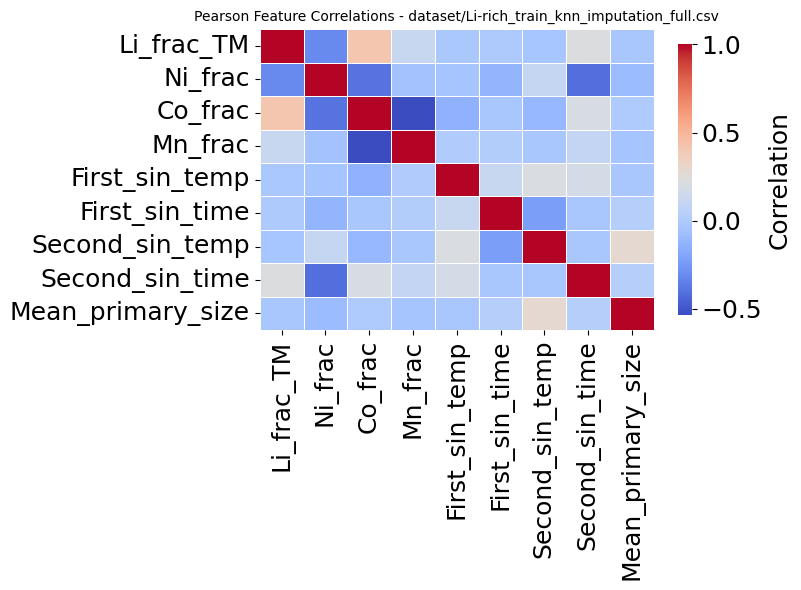

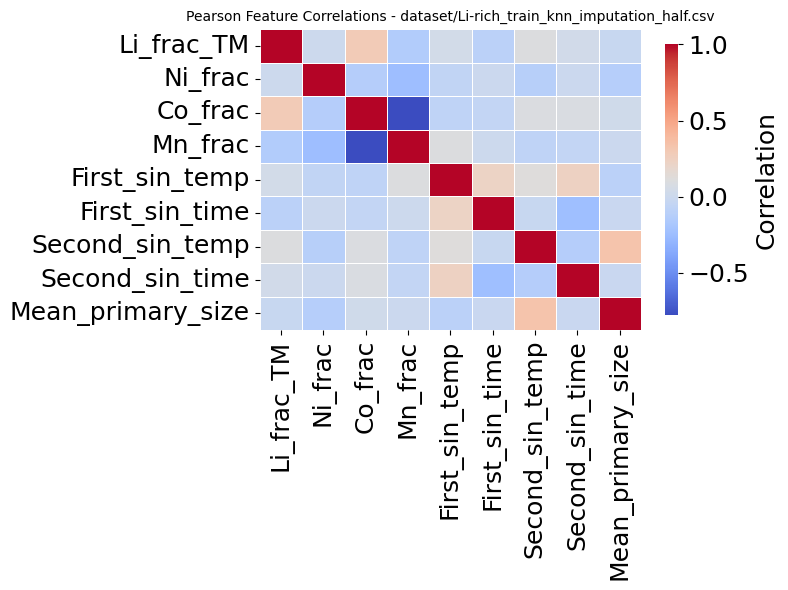

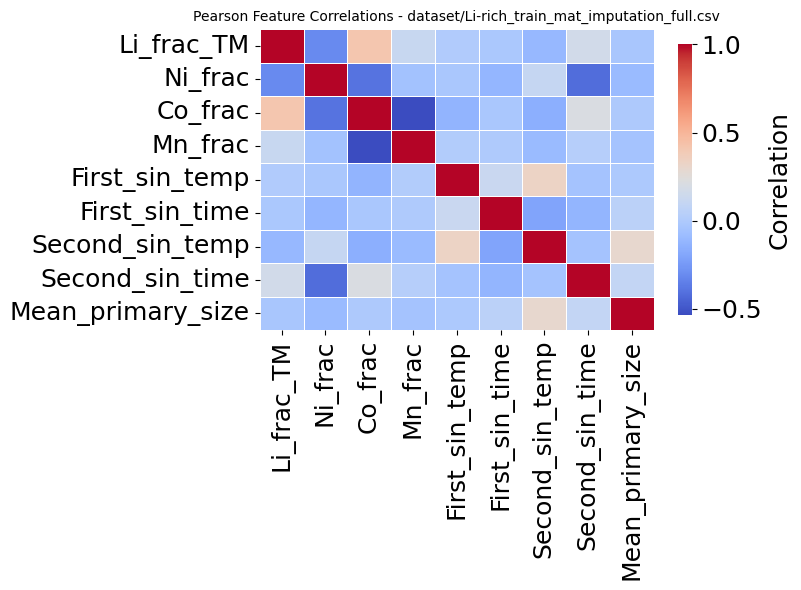

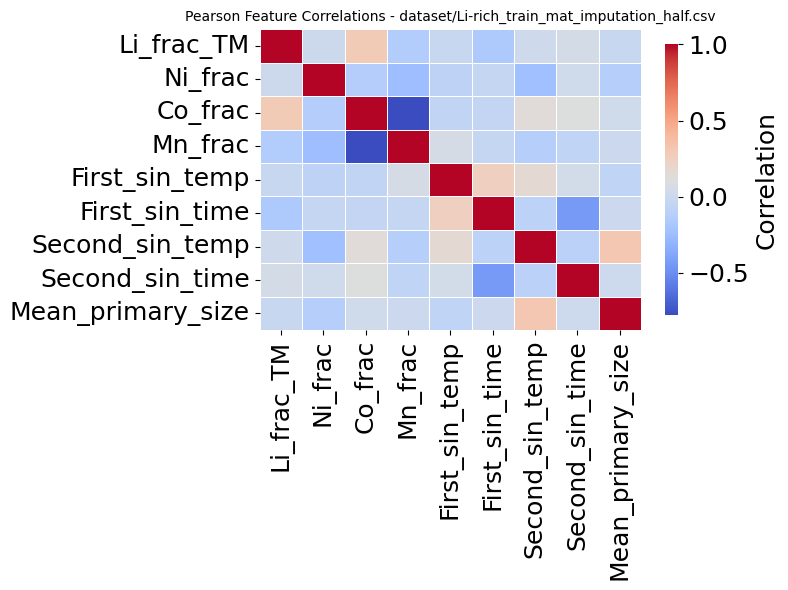

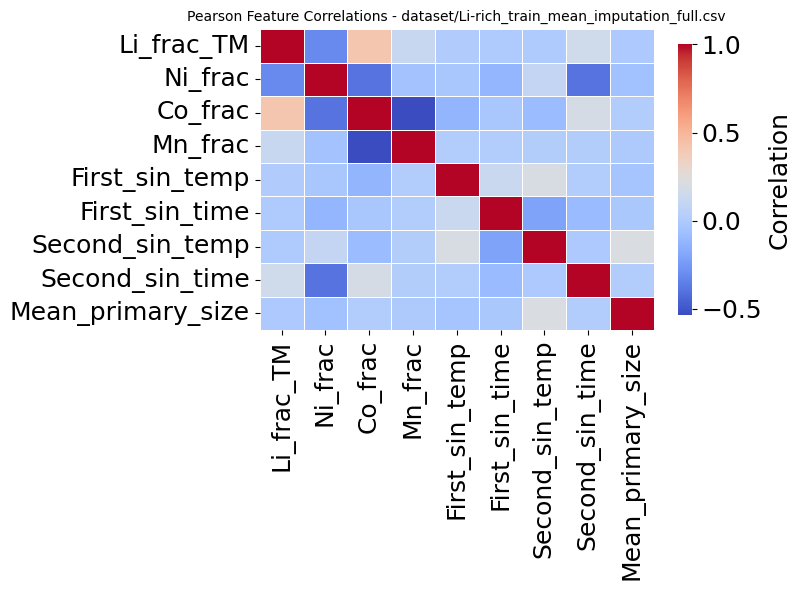

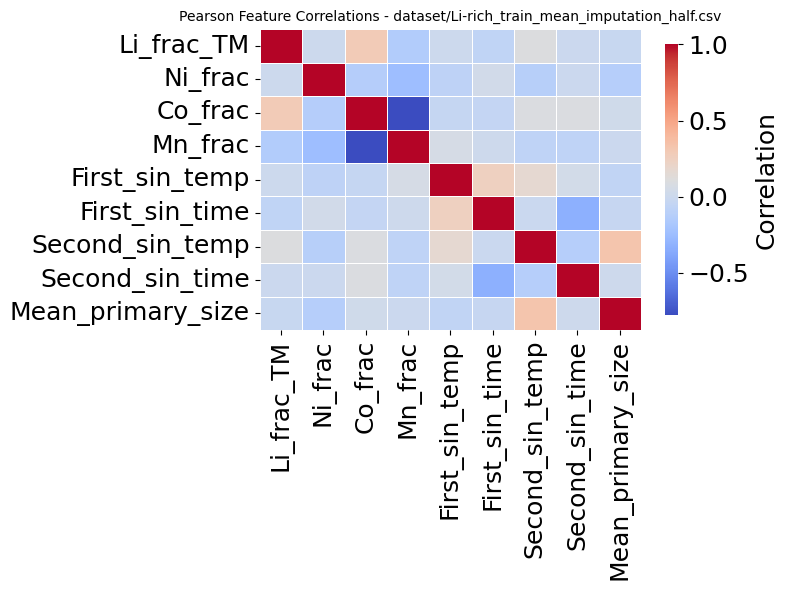

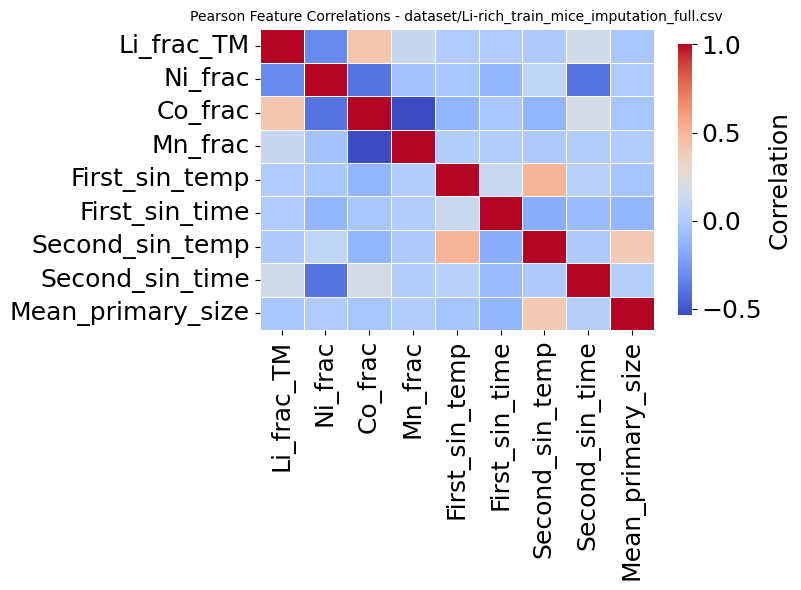

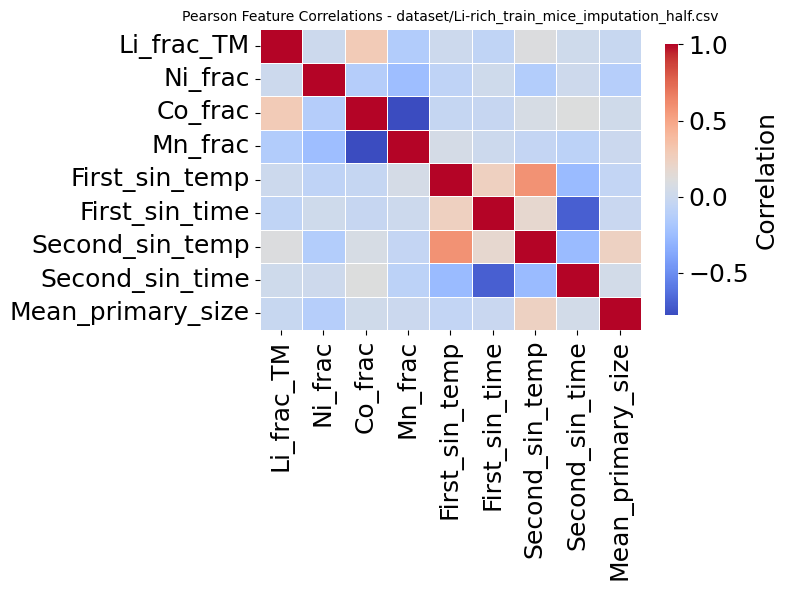

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# List of CSV file paths (you can specify the folder where your CSV files are stored)
file_paths = [
    "dataset/Li-rich_train_knn_imputation_full.csv", 
    "dataset/Li-rich_train_knn_imputation_half.csv", 
    "dataset/Li-rich_train_mat_imputation_full.csv", 
    "dataset/Li-rich_train_mat_imputation_half.csv", 
    "dataset/Li-rich_train_mean_imputation_full.csv", 
    "dataset/Li-rich_train_mean_imputation_half.csv", 
    "dataset/Li-rich_train_mice_imputation_full.csv", 
    "dataset/Li-rich_train_mice_imputation_half.csv"]


# Abbreviated feature names
abbreviated_features = {
    'Li_fraction_in_TM_layer': 'Li_frac_TM',
    'Ni_fraction': 'Ni_frac',
    'Co_fraction': 'Co_frac',
    'Mn_fraction': 'Mn_frac',
    'first_sintering_temperature': 'First_sin_temp',
    'first_sintering_time': 'First_sin_time',
    'second_sintering_temperature': 'Second_sin_temp',
    'second_sintering_time': 'Second_sin_time',
    'mean_primary_particle_size': 'Mean_primary_size'
}

# Loop through each file and calculate the correlation matrix
for file_path in file_paths:
    # Load the dataset
    df = pd.read_csv(file_path)

    # List of features to compare
    features = ['Li_fraction_in_TM_layer', 'Ni_fraction', 'Co_fraction', 'Mn_fraction',
                'first_sintering_temperature', 'first_sintering_time', 'second_sintering_temperature',
                'second_sintering_time', 'mean_primary_particle_size']

    # Select only the relevant columns from the dataframe
    df_selected = df[features]

    # Compute the Pearson correlation matrix
    correlation_matrix = df_selected.corr(method='pearson')

    # Rename columns and index to abbreviations
    correlation_matrix.rename(columns=abbreviated_features, index=abbreviated_features, inplace=True)

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(8, 6))
    sns_heatmap = sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5,
                             annot_kws={"size": 12},  # Adjust font size for annotations
                             cbar_kws={"shrink": 0.9})  # Adjust colorbar size

    # Adjusting axis labels and rotating them
    plt.xticks(rotation=90, fontsize=18)  # Rotate x-axis labels and set font size
    plt.yticks(rotation=0, fontsize=18)  # Rotate y-axis labels and set font size

    # Adjust the colorbar font size
    cbar = sns_heatmap.collections[0].colorbar
    cbar.set_label('Correlation', fontsize=18)  # Color bar label font size
    cbar.ax.tick_params(labelsize=18)  # Color bar tick label font size

    # Title and show plot
    plt.title(f'Pearson Feature Correlations - {file_path}', fontsize=10)
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

